# Python Programming and Big-Data

- This notebook contains a very accelerated summary of the basics of python. If this is challenging, please refer to the textbook sections.
- Being able to successfully run this also means you have a working Python environment! You now have installed everything you need to run this course.


## Python Basics

In [61]:
# Comments: The hashtag makes the rest of the line a comment. The more programming you do, the more you focus on making good comments.
# Jupyter lets you write formatted text, but you'll still want to put comments in the raw python.

# Assign some text (a string) to a variable
some_text = 'This is the text.'

# Assign some numbers to variables
a = 5  # Here, we implicitly told python that a is an integer
b = 4.6  # Here, we told python that b is a floating point number (a decimal)

- Even though nothing is outputted above, our Python "Kernel" has the values to each variable stored for later use.

### Important note: Python is not a "typed" language

- Notice that above, we added an integer and the float (a floating point number, i.e., one with a decimal point). Python "smartly" redefines variables so that they work together.

- This is different from other languages which require you to manually manage the "types" of your variables.

In [62]:
# Python as a calculator. 
sum_of_two_numbers = a + b

# Printing output to the console
print('Our output was', sum_of_two_numbers)

Our output was 9.6


- In the above, you'll notice the result was a float.
- If needed, you can demand that python specify something as a certain type, as below.

In [63]:
sum_as_int = int(sum_of_two_numbers)
sum_as_int_back_to_float = float(sum_as_int)

print('We lost some precision in this operation:', sum_as_int_back_to_float)

We lost some precision in this operation: 9.0


## Other python types

In [64]:
# Reminder, this assumes you have setup an envioronment with conda using:
list_1 = [4, 5, 6]
print('list_1', list_1)


list_1 [4, 5, 6]


In [65]:
# You can embed lists in lists in lists, etc.
list_2 = [[5, 3, 5], [6, 6, 5]]
print(list_2)


[[5, 3, 5], [6, 6, 5]]


In [66]:
# Dictionaries
dictionary_1 = {23: "Favorite number", 24: "Second favorite number"}
print('dictionary_1', dictionary_1)

# Here is a multi line string: (also discusses improved capabilities of an IDE editor)

things_you_can_do_in_vs_code_that_you_cant_do_without_an_ide = """
1.) Move back and forth in your history of cursor positions (using your mouse forward and back buttons)
2.) Edit on multiple lines at the same time (hold alt and click new spots)
3.) Smartly paste DIFFERENT values
4.) Duplicate lines (ctrl-d)
5.) Introspection (e.g., jump between function definition and usages)
6.) Debugging (Interactively walk through your code one line at a time)
7.) Profiling your code (see which lines take the most time to compute.)
8.) Keep track of a history of copy-paste items and paste from past copies. (ctrl-shift-v)
"""


dictionary_1 {23: 'Favorite number', 24: 'Second favorite number'}


## Looping

In [67]:


small_range = range(0, 10)
print('small_range:', small_range)

small_range_as_list = list(range(0, 10))
print('small_range_as_list:', small_range_as_list)

# Here is a for loop. Also note that python EXPLICITLY USES TAB-LEVEL to denote nested things.
# I.e., the inner part of the loop is tabbed 1 level up. Python does not use { like  R.
# I LOVE this notation and it's a big part of why python is so pretty and readable.
sum = 0 # Set the initial variable values
num = 0
sum_with_some = 0
for i in range(100, 136, 3):
    sum = sum + i
    num = num + 1

    # loop within a loop
    for j in range(200, 205):
        sum_with_some = sum + j

mean = sum / num
print('mean', mean)


small_range: range(0, 10)
small_range_as_list: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
mean 116.5



## Defining functions

In [68]:
# Functions
def my_function(input_parameter_1, input_parameter_2):
    product = input_parameter_1 * input_parameter_2
    return product

# Use the function
value_returned = my_function(2, 7)
print(value_returned)

14


## In-class exercise 2.1 

Make a function that returns the square of a number. Combine the function  with a loop to calculate the Sum of Squared Numbers from 1 to 100.

HINT, ** is the exponent operator in python.

BONUS: Make sure you're actually right by inserting a print statement in each step.

In [69]:
# In-class exercise workspace

## Importing packages

In [70]:

# Built-in packages via the Python Standard Library
import math
import os, sys, time, random

# Using imported modules
number_rounded_down = math.floor(sum_of_two_numbers)
print(number_rounded_down)


9


## Using packages from elsewhere

When we used Mambaforge, we installed a ton of packages. These were not "built-in" to python like the ones above. Here we will import them into our notebook to use.

This will also illustrate the use of numpy. We'll use it so much we us the ```as``` code to name it something shorter.

In [71]:
import numpy as np # The as just defines a shorter name

# Create an 2 by 3 array of integers
small_array = np.array([[5, 3, 5], [6, 6, 5]])

print('Here\'s a small numpy array\n', small_array)

# Sidenote: from above backspace \ put in front of a character is the
# "escapce character," which makes python interpret the next thing as a string or special text operator. \n makes a line break

Here's a small numpy array
 [[5 3 5]
 [6 6 5]]


## Discussion point

The array above looks identical to the nested lists we made. It IS NOT! It is a numpy array that is ridiculously fast and can scale up to massive, massive data questions. The optional reading for today (Harris et al. 2020, Nature) discusses how these arrays have formed the backbone of modern scientific computing.

In [72]:
low = 3
high = 8
shape = (1000, 1000)

smallish_random_array = np.random.randint(low, high, shape)

print('Here\'s a slightly larger numpy array\n', smallish_random_array)


Here's a slightly larger numpy array
 [[5 3 3 ... 4 4 3]
 [4 5 5 ... 5 4 7]
 [5 5 3 ... 4 7 4]
 ...
 [4 5 5 ... 6 3 4]
 [3 7 4 ... 7 5 4]
 [7 4 3 ... 3 3 4]]


## Reading a geotiff as a raster

The workhorse library at the heart of open-source earth analytics is GDAL (Geospatial Data Abstraction Library). It can read almost any spatial raster type. We're going to use it to load a raster from an old publication of mine (Johnson et al. 2014, PNAS).

In [73]:

# We will load a geotiff as a numpy array using GDAL
from osgeo import gdal

# First, we have to point GDAL to where the file is saved. This is remarkably difficult  (at least, as measured by how many hours I have wasted because my code pointed to the wrong place).
# A the superior way to manage this is with RELATIVE PATHS. 
# Here, we define the filename, the directory in relative terms, and then join them together using the os functions.

geotiff_filename = 'crop_production_tons_per_cell.tif'
data_directory = '../../../Data'
geotiff_file_path = os.path.join(data_directory, geotiff_filename)

# Sometimes it can be useful to see what is in the directory you've specified (to help you figure out what's going on if it can't find the file)
contents = os.listdir(data_directory)
print(contents)


['assignment_06.zip', 'Production_Crops_E_All_Data_(Normalized).zip', 'gtap_invest', 'assignment_5', 'ESACCI-LC-L4-LCCS-Map-300m-P1Y-2010-v2.0.7.tif', 'ESACCI-LC-L4-LCCS-Map-300m-P1Y-2010-v2.0.7.tif.aux.xml', 'ESACCI-LC-L4-LCCS-Map-300m-P1Y-2010-v2.0.7.tif.ovr', 'ESACCI-LC-L4-LCCS-Map-300m-P1Y-2015-v2.0.7.tif', 'ESACCI-LC-L4-LCCS-Map-300m-P1Y-2015-v2.0.7.tif.aux.xml', 'ESACCI-LC-L4-LCCS-Map-300m-P1Y-2015-v2.0.7.tif.ovr', 'landsat.zip', 'maize_HarvAreaYield_Geotiff.zip', 'maize_HarvestedAreaFraction.tif', 'maize_HarvestedAreaFraction.tif.aux.xml', 'maize_HarvestedAreaFraction.tif.ovr', 'maize_HarvestedAreaHectares.tif', 'maize_HarvestedAreaHectares.tif.aux.xml', 'maize_HarvestedAreaHectares.tif.ovr', 'maize_Production.tif', 'maize_Production.tif.aux.xml', 'maize_Production.tif.ovr', 'maize_YieldPerHectare.tif', 'maize_YieldPerHectare.tif.aux.xml', 'maize_YieldPerHectare.tif.ovr', 'MN-geospatial.zip', 'ne_110m_admin_0_countries.cpg', 'ne_110m_admin_0_countries.dbf', 'ne_110m_admin_0_coun

In [74]:
# If you want to be super clear, you can actually check if it exists
print(os.path.exists(geotiff_file_path))

True


In [75]:

# First, open the gdal dataset
crop_production_tons_per_cell = gdal.Open(geotiff_file_path)
print(crop_production_tons_per_cell)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x00000151913B0F00> >


In [76]:

# The dataset object holds information about the area and extent of the data, or the geotransform information
geotransform = crop_production_tons_per_cell.GetGeoTransform()
projection = crop_production_tons_per_cell.GetProjection()
print('GDAL dataset geotransform', geotransform)


GDAL dataset geotransform (-180.0, 0.0833333333333286, 0.0, 89.99999999998977, 0.0, -0.0833333333333286)


In [77]:


# IMPORTANT ANNOYING NOTE: in programming, there are different conventions for identifying a place by rows, cols vs. x, y vs. upper-left, lower-right, etc.
# Numpy is denoted row, col but gdal is denoted X, Y (which flips the order). Just memorize that row = Y and col = X.

n_rows = crop_production_tons_per_cell.RasterYSize
print('Number of rows in a GDAL dataset', n_rows)

n_cols = crop_production_tons_per_cell.RasterXSize
print('Number of columns in a GDAL dataset', n_cols)

# Next, get the "band" of the dataset. Many datasets have multiple layers (e.g. NetCDFs).
# Geotiffs only have 1 band by default, so we just grab band 1
carbon_conserved_band = crop_production_tons_per_cell.GetRasterBand(1)

# The band object has information too, like the datatype of the geotiff:
data_type = carbon_conserved_band.DataType
no_data_value = carbon_conserved_band.GetNoDataValue()

# Finally, we can get the array from the band as a numpy array:
c = carbon_conserved_band.ReadAsArray()
shape = c.shape

print('Look at the array itself', c)
print('Add up the array', np.sum(c))


Number of rows in a GDAL dataset 2160
Number of columns in a GDAL dataset 4320
Look at the array itself [[-255. -255. -255. ... -255. -255. -255.]
 [-255. -255. -255. ... -255. -255. -255.]
 [-255. -255. -255. ... -255. -255. -255.]
 ...
 [-255. -255. -255. ... -255. -255. -255.]
 [-255. -255. -255. ... -255. -255. -255.]
 [-255. -255. -255. ... -255. -255. -255.]]
Add up the array 6241604554.860037


## High-performance computing with Numpy

In [78]:
# Make a copy in memory for us to play with. NOTE that if we just did c_view = c and then modified c_view, the c array would also be changed.
c_view = c # This only creates a new pointer to the same block of memory on your computer that holds the array. If we change c_view, c will also be changed.
c_calcs = c.copy() # This gives us a NEW array in a new block of memory, so changing c_calcs will not change c.

# Get specific elements in the array with [row, col]
specific_value = c_calcs[400, 500]

# Or you can get values between a range of rows and cols with :
chunk_of_array = c_calcs[1000:1100, 1600:1700] # This would give you a 100 by 100 subarray

print(chunk_of_array)


[[-255.         -255.         -255.         ... -255.
  -255.         -255.        ]
 [-255.         -255.         -255.         ... -255.
  -255.         -255.        ]
 [-255.         -255.         -255.         ... -255.
  -255.         -255.        ]
 ...
 [4053.17534645 2424.65772999 2309.56214063 ... -255.
  -255.         -255.        ]
 [2340.01283536  934.6991384  1301.41934136 ... -255.
  -255.         -255.        ]
 [1104.33726845    0.          380.04900385 ... -255.
  -255.         -255.        ]]


In [79]:
print(chunk_of_array.shape)

(100, 100)


In [80]:

# Or you can select out a subset of the array based on a logic conditional
conditional_subset = c_calcs[c_calcs>10000]

# Note that when we took the conditional subset, the array dimensions no longer made sense (there now are unspecified missing locations).
# Numpy deals with this by flattening the array to 1 dimension.
print('conditional_subset shape', conditional_subset.shape)


conditional_subset shape (231093,)


In [81]:

# But, if we don't save it as a new array (and do something like reassigning values), it retains the array's shape.
# print('Sum of c_calcs before changing values', np.sum(c_calcs))

# Change all values in c_calcs that are > 10000 to 22 IN-PLACE (i.e., changes the underlying c_calcs array).
c_calcs[c_calcs>10000] = 22
print('Sum of c_calcs after changing values', np.sum(c_calcs))


Sum of c_calcs after changing values -195641246.3809901


In [82]:

# Set c_calcs back to the original by taking a new copy
c_calcs = c.copy()

# If you dont want to overwrite c_calcs, the above method won't work unless you create another copy first.
d = c_calcs.copy()

d[(d > 200) & (d < 10000)] = 33 # Note, unlike vanilla python, Numpy conditionals here must use & and must be in parenthases.
print('The sum of d after we messed with it', np.sum(d))


The sum of d after we messed with it 4654336982.408939


## Plotting an array

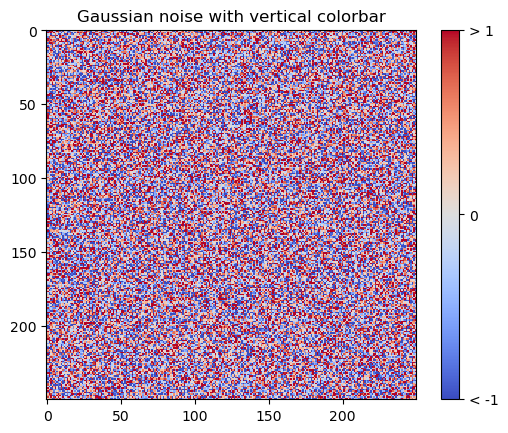

In [83]:

# Sightly more complex example
# Create a new figure and axes.
import matplotlib
from matplotlib import pyplot as plt

fig, ax = plt.subplots()

# Make up some data
data = np.clip(np.random.randn(250, 250), -1, 1)

# Use the axes object to show the data with a coolwarm colorbar
cax = ax.imshow(data, interpolation='nearest', cmap=matplotlib.cm.coolwarm)

# Give a title to the axis.
ax.set_title('Gaussian noise with vertical colorbar')

# Add a colorbar to  the figure
cbar = fig.colorbar(cax, ticks=[-1, 0, 1]) # Add colorbar, make sure to specify tick locations to match desired ticklabels

# Modify the axes within the colorbar
cbar.ax.set_yticklabels(['< -1', '0', '> 1'])  # vertically oriented colorbar

# Show it.
plt.show()

In [84]:

# Save the as a new geotiff to disk

# Create a new filename for our output file. The + concatenates things. Str() makes the number a string.
# This is one of those cases where python wouldn't correctly guess the data type
output_filename = 'gdal_created_array_' + str(random.randint(1, 1000000)) + '.tif'
output_path = os.path.join(data_directory, output_filename)

# Create a new file at that filename location using the attributes we used above
# Notice that we flipped n_cols and n_rows from how numpy would have wanted it.
output_dataset = gdal.GetDriverByName('GTiff').Create(output_path, n_cols, n_rows, 1, data_type)

# Set dataset-level information
output_dataset.SetGeoTransform(geotransform)
output_dataset.SetProjection(projection)

# Now get a band from our new dataset on which we'll write our array.
output_band = output_dataset.GetRasterBand(1)

# Do the array writing
output_band.WriteArray(d)

# Set any final band-level information
output_band.SetNoDataValue(no_data_value)

# Clear the array from memory (This will trigger the raster writing to disk)
output_band = None
output_dataset = None



## Pandas!

In [85]:

import pandas

food_prices_filename = 'world_monthly_food_prices.csv'
food_prices_path = os.path.join(data_directory, food_prices_filename)
food_prices = pandas.read_csv(food_prices_path)

print('Whole dataframe:', food_prices)


Whole dataframe:                                      Domain Code                  Domain  \
0                                             CP  Consumer Price Indices   
1                                             CP  Consumer Price Indices   
2                                             CP  Consumer Price Indices   
3                                             CP  Consumer Price Indices   
4                                             CP  Consumer Price Indices   
..                                           ...                     ...   
176                                           CP  Consumer Price Indices   
177                                           CP  Consumer Price Indices   
178                                           CP  Consumer Price Indices   
179                                           CP  Consumer Price Indices   
180  FAOSTAT Date: Wed Aug 17 16:12:56 CEST 2016                     NaN   

     AreaCode AreaName  ElementCode ElementName  ItemCode  \
0      50

In [86]:
print('List of column names:', food_prices.columns)


List of column names: Index(['Domain Code', 'Domain', 'AreaCode', 'AreaName', 'ElementCode',
       'ElementName', 'ItemCode', 'ItemName', 'Year', 'Value', 'Flag',
       'FlagD'],
      dtype='object')


In [87]:
print('Specific column:', food_prices['Value'])


Specific column: 0       99.5
1      101.5
2      106.5
3      112.5
4      119.2
       ...  
176    210.3
177    224.2
178    239.0
179    250.9
180      NaN
Name: Value, Length: 181, dtype: float64


In [88]:
print('Specific value in that column:', food_prices['Value'][6])


Specific value in that column: 132.2


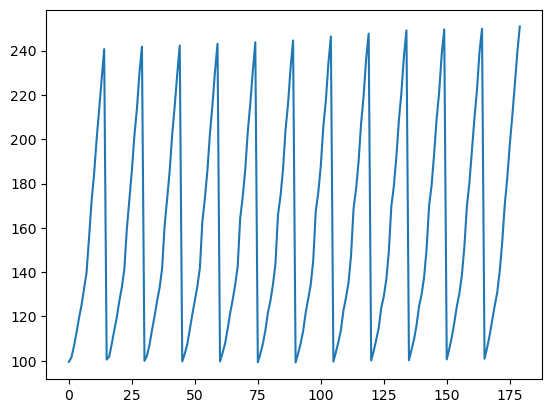

In [89]:

import matplotlib
from matplotlib import pyplot as plt
plt.plot(food_prices['Value'])
plt.show() 